Thompson Sampling

import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import dataset

In [2]:
dataset = pd.read_csv('ads_ctr_optimisation.csv')

Implementing Thompson Sampling

In [3]:
import random
N = 10000
d = 10
ads_selected = []

Step 1

In [4]:
numbers_of_rewards_1 = [1] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

Step 2

In [5]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        # Step 2
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # Step 3
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

Visualising the results

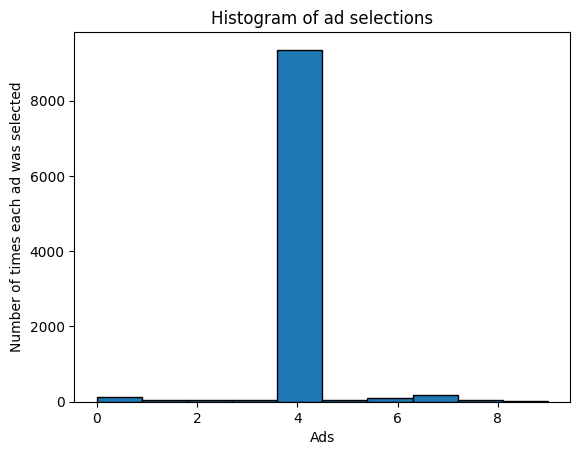

In [6]:
plt.hist(ads_selected, edgecolor = 'black')
plt.title('Histogram of ad selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()